## Euclidean and Manhattan Distance Calculations

In this short mini project you will see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms you'll be using such as Prinical Components Analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from google.colab import files
upload=files.upload()

Saving distance_dataset.csv to distance_dataset.csv


In [4]:
# Load Course Numerical Dataset
df = pd.read_csv('/content/distance_dataset.csv',index_col=0)
df.head(20)

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1
5,8.603603,7.814540,4.665156,2
6,5.437303,4.339278,5.289866,4
7,5.208212,4.342575,7.883493,3
8,7.992001,6.707307,2.078811,2
9,8.547208,7.624946,6.353267,2


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [5]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [6]:
distEuclid = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

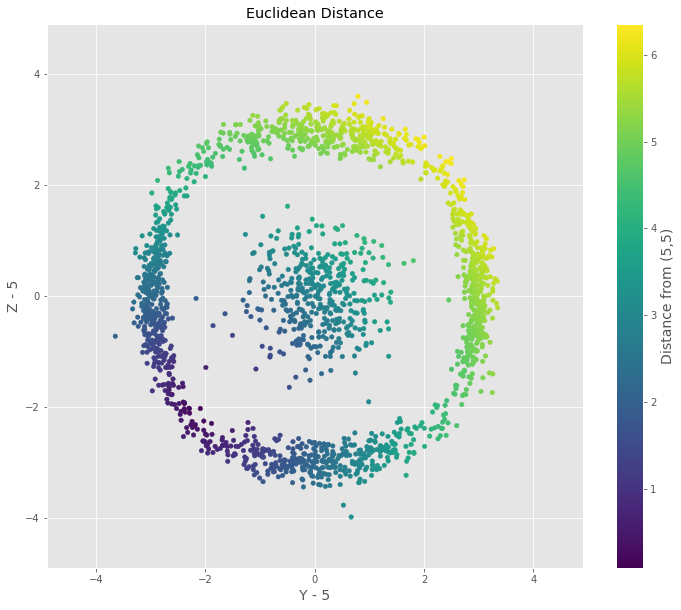

In [73]:
figEuclid = plt.figure(figsize=[12,10])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

figEuclid.savefig('Euclidean_scatter.png')

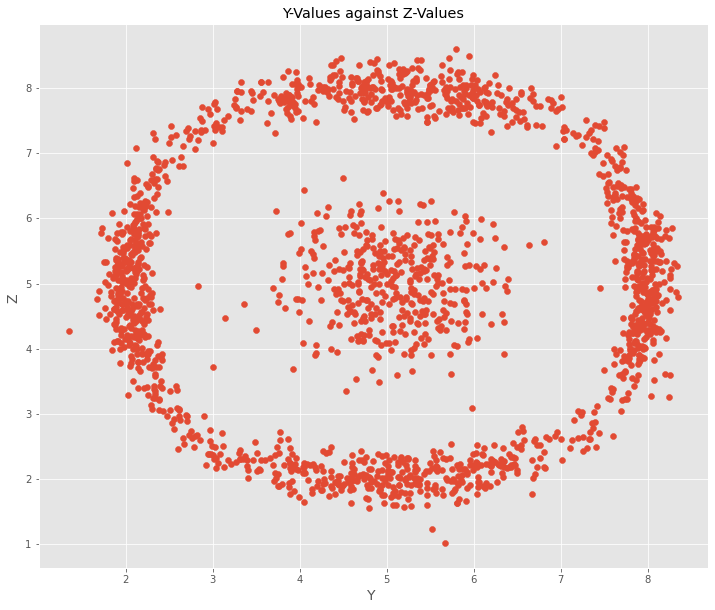

In [74]:
_ = plt.figure(figsize=[12,10])
_ = plt.scatter(df.Y, df.Z)
_ = plt.xlabel('Y ', size=14)
_ = plt.ylabel('Z ', size=14)
_ = plt.title('Y-Values against Z-Values')
plt.show()

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measure distances along the coorinate axis which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points laying at the same distance define a circle that looks like a Euclidean square.

In [10]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

In [11]:
distManhattan = np.abs(df.X - 4) + np.abs(df.Z - 5)

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [12]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].to_numpy()
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

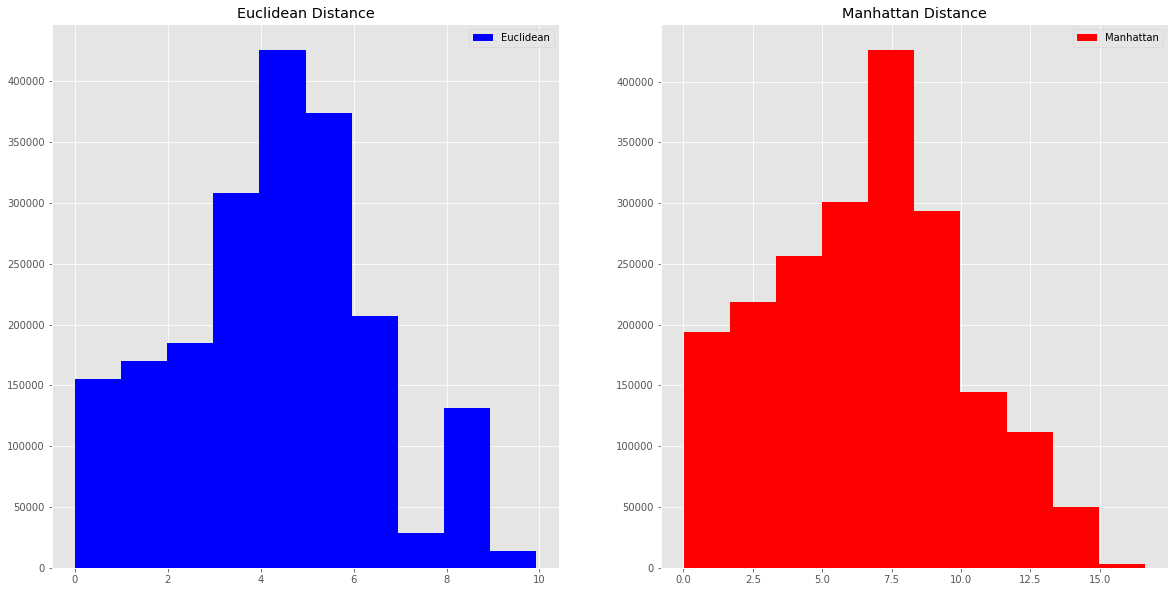

In [70]:
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].title.set_text('Euclidean Distance')
axs[1].title.set_text('Manhattan Distance')
#plt.title('EuclideanDistance VS ManhattanDistance')
axs[0].hist(DistEuclid, label='Euclidean', color='blue')
axs[1].hist(DistManhattan, label='Manhattan', color='red')
axs[0].legend(loc = 'upper right')
plt.legend()
plt.savefig('EvsM.png')

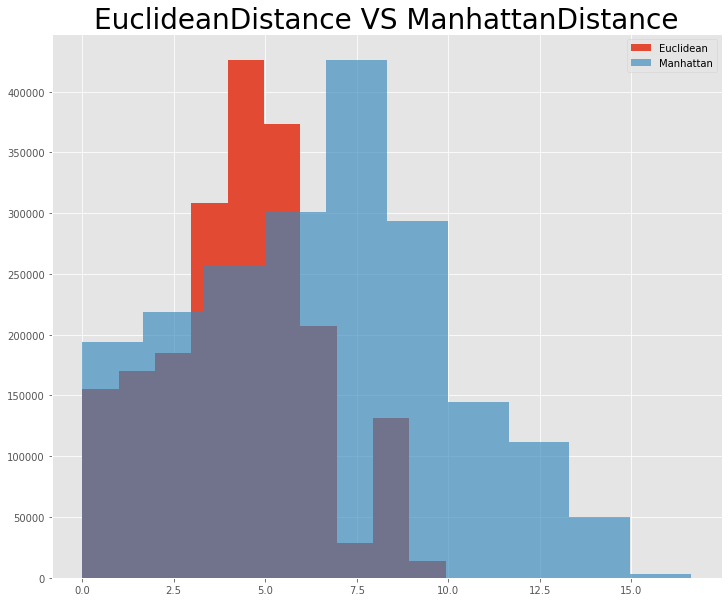

In [68]:
_ = plt.figure(figsize=[12,10])
_ = plt.title('EuclideanDistance VS ManhattanDistance', size = 28)
_ = plt.hist(DistEuclid, label = 'Euclidean')
_ = plt.hist(DistManhattan, label = 'Manhattan', alpha = 0.65)
#axs[0].legend(loc='upper left')
#_ = axs[0].plot(loc = 'upper left')
#_ = axs[1].plot(label = 'Rn')
plt.legend()
plt.show()